# IBM HR Analytics Employee Attrition & Performance

## **Introduction**

Employee attrition is a critical challenge faced by organizations, leading to increased costs, reduced productivity, and disruptions in team dynamics. This project aims to address this challenge by leveraging data analytics and machine learning to analyze and predict employee turnover. By understanding the patterns and factors contributing to attrition, organizations can implement targeted strategies to retain valuable talent and improve overall employee satisfaction.

The dataset used for this project is the **IBM HR Analytics Employee Attrition & Performance** dataset, publicly available on Kaggle. This dataset contains 1,470 records and 35 variables, capturing a wide range of employee-related factors such as demographics, job roles, compensation, and work environment characteristics. With this dataset, we aim to uncover actionable insights and build predictive models to forecast which employees are at risk of leaving the company.

---

## **Research Questions**

This project focuses on addressing the following research questions:

### **Descriptive Questions:**
1. What is the average monthly income across different job roles?
2. Which department has the highest attrition rate?
3. How does attrition vary by gender?
4. What is the relationship between age and the likelihood of attrition?
5. What is the distribution of job satisfaction levels among employees who left versus those who stayed?

### **Predictive Question:**
1. Can we predict whether an employee will leave the company based on their demographics, job role, and work environment?

By answering these questions, this project aims to provide actionable insights to HR teams for reducing attrition rates and improving employee retention.


## **Data Import and Overview**

In this section, we will import the dataset, explore its structure, and provide a high-level overview of the data. This step is crucial to understand the available variables, their types, and any potential data quality issues that need to be addressed in the preprocessing stage.

### **Dataset Description:**
- **Source:** The dataset is the IBM HR Analytics Employee Attrition & Performance dataset, publicly available on Kaggle.
- **Observations:** 1,470 employee records.
- **Variables:** 35 features, including demographic details, job roles, work environment factors, and compensation.
- **Target Variable:** Attrition (indicates whether an employee left the company: Yes/No).
- **Data Types:** A mix of categorical and numerical variables.

### **Objective of This Step:**
- Import the dataset into Python.
- Display the first few rows to understand the data structure.
- Summarize the dataset to identify variable types, missing values, and initial insights.


In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = r'C:\Users\tekip\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)


# Display the first few rows
print("First five rows of the dataset:")
display(df.head())




First five rows of the dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [29]:
# Summary of the dataset
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Jo

In [30]:
print("\nStatistical Summary of Numerical Features:")
display(df.describe())



Statistical Summary of Numerical Features:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [31]:
# Check for missing values
print("\nMissing Values Count:")
display(df.isnull().sum())


Missing Values Count:


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Observations from the Dataset
No Missing Values:

All 35 columns have complete data with no missing values.
Data Types:

Numerical Columns: Age, DailyRate, MonthlyIncome, YearsAtCompany, etc.
Categorical Columns: Attrition, BusinessTravel, Gender, Department, etc.
Potential Issues:

Columns like Over18 and EmployeeCount appear to have constant values and may not add meaningful insights.
Categorical variables like Attrition, BusinessTravel, and OverTime will need encoding for modeling.
EmployeeNumber is likely just an identifier and can be dropped for analysis.

## **Data Preparation**

### **Objective:**
To prepare the dataset for analysis and modeling by:
- Removing irrelevant or redundant columns.
- Encoding categorical variables for compatibility with machine learning algorithms.
- Handling potential outliers in numerical columns.

### **Steps:**
1. Drop irrelevant columns such as:
   - `EmployeeCount`, `Over18`, `EmployeeNumber`, and `StandardHours` (constant or identifier columns).
2. Encode categorical variables:
   - Binary categories (e.g., `Attrition` and `OverTime`) will be converted to 0/1.
   - Multi-class categories (e.g., `BusinessTravel` and `Department`) will be one-hot encoded.
3. Inspect and handle outliers:
   - Focus on numerical variables like `MonthlyIncome` and `YearsAtCompany`.
4. Split the dataset into training and testing sets for predictive modeling.


In [32]:
# Drop irrelevant columns
columns_to_drop = ['EmployeeCount', 'Over18', 'EmployeeNumber', 'StandardHours']
df_cleaned = df.drop(columns=columns_to_drop, axis=1)

# Encode binary categorical variables
df_cleaned['Attrition'] = df_cleaned['Attrition'].map({'Yes': 1, 'No': 0})
df_cleaned['OverTime'] = df_cleaned['OverTime'].map({'Yes': 1, 'No': 0})

# One-hot encode multi-class categorical variables
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Handle outliers (example for MonthlyIncome)
q1 = df_encoded['MonthlyIncome'].quantile(0.25)
q3 = df_encoded['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_encoded = df_encoded[(df_encoded['MonthlyIncome'] >= lower_bound) & (df_encoded['MonthlyIncome'] <= upper_bound)]

# Train-test split
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data Preparation Complete.")
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Data Preparation Complete.
Training Data Shape: (949, 44)
Testing Data Shape: (407, 44)


## Exploratory Data Analysis (EDA) - Question 1


## Question 1: What is the average monthly income across different job roles?

Average Monthly Income by Job Role:
JobRole
Sales Representative          2626.000000
Laboratory Technician         3237.169884
Research Scientist            3239.972603
Human Resources               4235.750000
Sales Executive               6924.279141
Manufacturing Director        7295.137931
Healthcare Representative     7528.763359
Research Director            16033.550000
Manager                      17181.676471
Name: MonthlyIncome, dtype: float64


C:\Users\tekip\AppData\Local\Temp\ipykernel_23316\827745949.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_by_job.values, y=avg_income_by_job.index, palette='viridis')


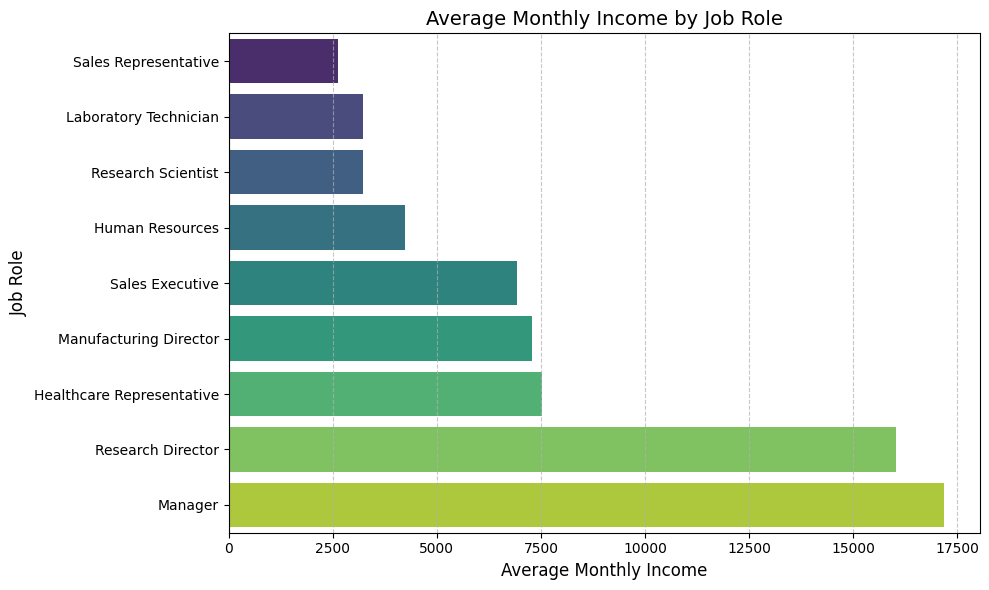

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by JobRole and calculate average MonthlyIncome
avg_income_by_job = df_cleaned.groupby('JobRole')['MonthlyIncome'].mean().sort_values()

# Display the results
print("Average Monthly Income by Job Role:")
print(avg_income_by_job)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_income_by_job.values, y=avg_income_by_job.index, palette='viridis')
plt.title('Average Monthly Income by Job Role', fontsize=14)
plt.xlabel('Average Monthly Income', fontsize=12)
plt.ylabel('Job Role', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Findings for Question 1: Average Monthly Income by Job Role

The analysis highlights notable differences in average monthly income across various job roles:

1. Managers have the highest average monthly income at $17,181.68, followed by Research Directors at $16,033.55.  
2. Sales Representatives earn the lowest average monthly income at $2,626.00, with Laboratory Technicians and Research Scientists earning around $3,237.  
3. Mid-level roles such as Sales Executives and Manufacturing Directors earn moderately high average incomes of $6,924.28 and $7,295.14, respectively.  

The bar chart visually emphasizes the disparity, clearly identifying roles with the highest and lowest earnings.

### Implications
Managers and Research Directors command significantly higher salaries, reflecting their seniority or specialized roles. Conversely, the lower salaries for Sales Representatives may correlate with higher attrition, a hypothesis that can be investigated further.


## Question 2: Which department has the highest attrition rate?

Attrition Rate by Department (%):
Department
Human Resources           19.047619
Research & Development    13.839750
Sales                     20.627803
Name: Attrition, dtype: float64


C:\Users\tekip\AppData\Local\Temp\ipykernel_23316\2882168651.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_dept.values, y=attrition_rate_by_dept.index, palette='coolwarm')


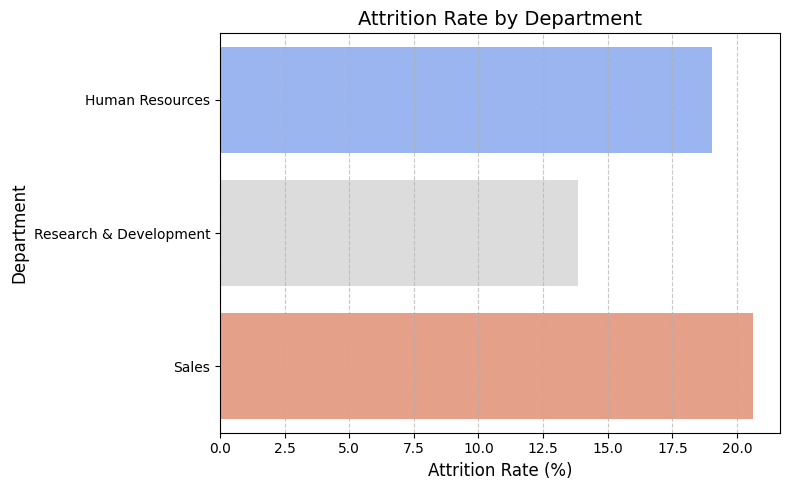

In [34]:
# Calculate attrition rate by department
attrition_rate_by_dept = df_cleaned.groupby('Department')['Attrition'].mean() * 100

# Display the results
print("Attrition Rate by Department (%):")
print(attrition_rate_by_dept)

# Plot the attrition rates
plt.figure(figsize=(8, 5))
sns.barplot(x=attrition_rate_by_dept.values, y=attrition_rate_by_dept.index, palette='coolwarm')
plt.title('Attrition Rate by Department', fontsize=14)
plt.xlabel('Attrition Rate (%)', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Findings for Question 2: Which Department Has the Highest Attrition Rate?

The analysis of attrition rates across departments revealed the following:

1. Sales has the highest attrition rate at 20.63%, indicating a significant turnover issue in this department.  
2. Human Resources has the second-highest attrition rate at 19.05%, which is also relatively high.  
3. Research & Development has the lowest attrition rate at 13.84%, suggesting better employee retention in this department.  

### Implications  
- The high attrition rate in the Sales department may be attributed to job-specific factors such as stress, targets, or compensation structure. This warrants further investigation to identify underlying causes.  
- Human Resources also shows a notable attrition rate, which could impact the organization's internal HR processes and employee satisfaction initiatives.  
- Research & Development appears to have more stable employee retention, which could serve as a benchmark for other departments.  

The bar chart provides a clear visual representation of the attrition rates, highlighting the differences among departments and emphasizing the need to address turnover in the Sales and Human Resources departments.


## Question 3: How Does Attrition Vary by Gender?

### Steps for Analysis:

Group the data by Gender and calculate the attrition rate for each gender:

Attrition rate = (Number of employees who left / Total employees of that gender) * 100.

Visualize the attrition rates using a bar chart to compare between male and female employees.

Attrition Rate by Gender (%):
Gender
Female    14.795918
Male      17.006803
Name: Attrition, dtype: float64


C:\Users\tekip\AppData\Local\Temp\ipykernel_23316\2286694134.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_gender.index, y=attrition_rate_by_gender.values, palette='pastel')


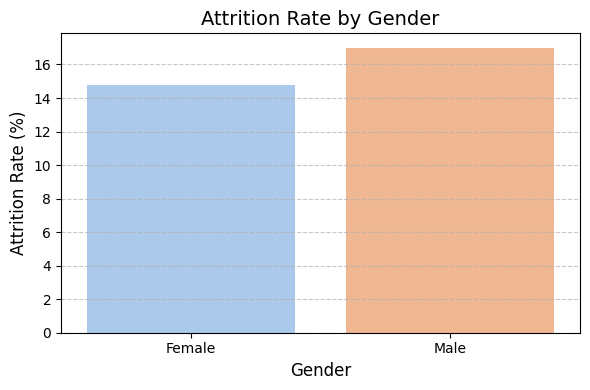

In [35]:
# Calculate attrition rate by gender
attrition_rate_by_gender = df_cleaned.groupby('Gender')['Attrition'].mean() * 100

# Display the results
print("Attrition Rate by Gender (%):")
print(attrition_rate_by_gender)

# Plot the attrition rates
plt.figure(figsize=(6, 4))
sns.barplot(x=attrition_rate_by_gender.index, y=attrition_rate_by_gender.values, palette='pastel')
plt.title('Attrition Rate by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Findings for Question 3: How Does Attrition Vary by Gender?

The analysis of attrition rates by gender reveals the following insights:

1. Male employees have a higher attrition rate of 17.01% compared to female employees, who have an attrition rate of 14.80%.
2. The difference between the attrition rates is relatively small but indicates that male employees are slightly more likely to leave the organization.

### Implications

- The higher attrition rate among male employees may be influenced by factors such as job roles, work conditions, or compensation structures. Further analysis could provide a deeper understanding of these trends.
- Female employees show a slightly lower attrition rate, which could indicate the effectiveness of retention policies targeted at improving their work experience or satisfaction.

The bar chart visually highlights the differences in attrition rates between male and female employees, underscoring the need to explore gender-specific retention strategies if required.


### Question 4: What is the Relationship Between Age and the Likelihood of Attrition?

### Steps for Analysis:
Analyze the relationship between age and attrition by visualizing:
The distribution of ages for employees who left (Attrition = 1) versus those who stayed (Attrition = 0).
Use a boxplot and kdeplot to compare the age distributions.
Summarize any noticeable patterns or trends.

C:\Users\tekip\AppData\Local\Temp\ipykernel_23316\3393164260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Age', data=df_cleaned, palette='pastel')


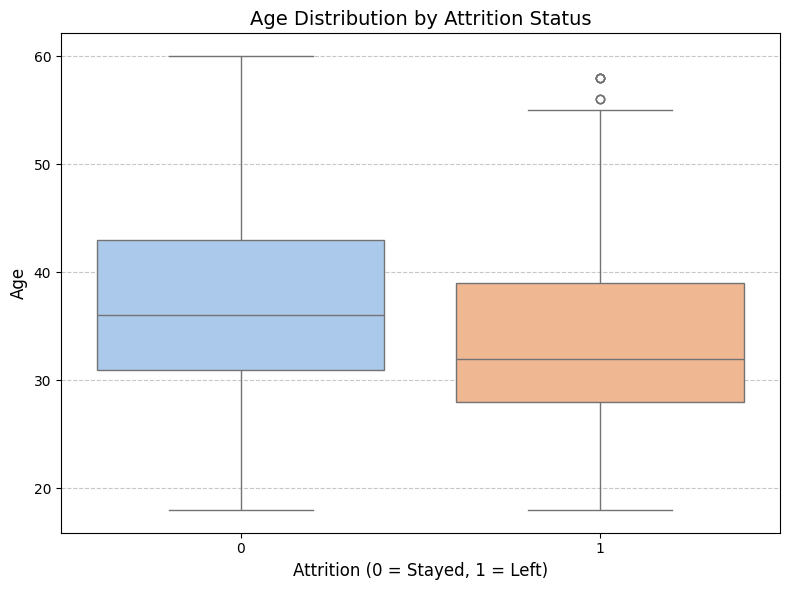

C:\Users\tekip\AppData\Local\Temp\ipykernel_23316\3393164260.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_cleaned[df_cleaned['Attrition'] == 0]['Age'], label='Stayed', shade=True, color='blue')
C:\Users\tekip\AppData\Local\Temp\ipykernel_23316\3393164260.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_cleaned[df_cleaned['Attrition'] == 1]['Age'], label='Left', shade=True, color='red')


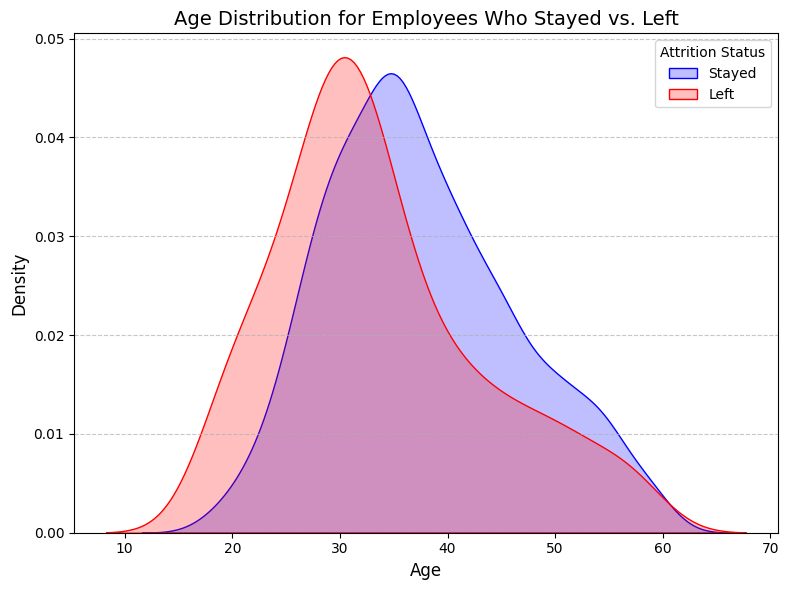

In [36]:
# Visualize the relationship between age and attrition using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='Age', data=df_cleaned, palette='pastel')
plt.title('Age Distribution by Attrition Status', fontsize=14)
plt.xlabel('Attrition (0 = Stayed, 1 = Left)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize the age distributions using kdeplot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_cleaned[df_cleaned['Attrition'] == 0]['Age'], label='Stayed', shade=True, color='blue')
sns.kdeplot(data=df_cleaned[df_cleaned['Attrition'] == 1]['Age'], label='Left', shade=True, color='red')
plt.title('Age Distribution for Employees Who Stayed vs. Left', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Attrition Status', labels=['Stayed', 'Left'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Findings for Question 4: What is the Relationship Between Age and the Likelihood of Attrition?

The analysis provides insights into how age influences the likelihood of attrition:

1. Employees who left the organization tend to be younger, with a median age of approximately 30 years.  
2. Employees who stayed have a wider age distribution, with a median age closer to 37-38 years.  
3. The KDE plot highlights that attrition is more concentrated among younger employees (under 35 years), while employees over 40 years are more likely to remain with the organization.  

### Implications

- Younger employees may have different career priorities, such as seeking growth opportunities, higher salaries, or work-life balance, which could contribute to their higher attrition rates.  
- Retention strategies should focus on addressing the needs of younger employees through tailored programs, mentorship, and career development opportunities.  
- Employees over 40 years appear to have greater job stability, which could reflect satisfaction with their roles or organizational policies.

The boxplot and KDE plot effectively illustrate the relationship between age and attrition, emphasizing the need to understand and address the specific challenges faced by younger employees.


### Question 5: What is the Distribution of Job Satisfaction Levels Among Employees Who Left Versus Those Who Stayed?

### Steps for Analysis:
Group the data by Attrition and calculate the distribution of JobSatisfaction levels.
Use a stacked bar chart to compare the proportions of job satisfaction levels between employees who left (Attrition = 1) and those who stayed (Attrition = 0).

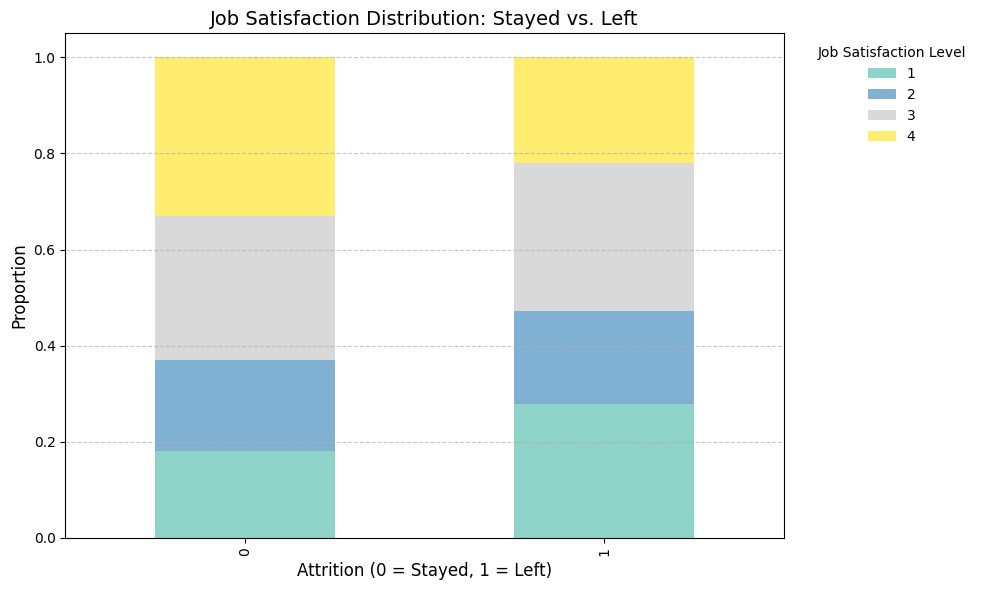

In [37]:
# Calculate the distribution of JobSatisfaction levels for each Attrition group
job_satisfaction_distribution = df_cleaned.groupby(['Attrition', 'JobSatisfaction']).size().unstack()

# Normalize the distribution to show proportions
job_satisfaction_distribution_normalized = job_satisfaction_distribution.div(job_satisfaction_distribution.sum(axis=1), axis=0)

# Plot the stacked bar chart
job_satisfaction_distribution_normalized.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Job Satisfaction Distribution: Stayed vs. Left', fontsize=14)
plt.xlabel('Attrition (0 = Stayed, 1 = Left)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Job Satisfaction Level', loc='upper center', bbox_to_anchor=(1.15, 1), frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Findings for Question 5: What is the Distribution of Job Satisfaction Levels Among Employees Who Left Versus Those Who Stayed?

The analysis of job satisfaction levels reveals the following patterns:

1. Employees who stayed (Attrition = 0) show a more balanced distribution of job satisfaction levels, with a significant proportion in the higher satisfaction levels (3 and 4).  
2. Employees who left (Attrition = 1) are more concentrated in the lower satisfaction levels (1 and 2).  
3. The proportion of employees with the highest job satisfaction level (4) is much lower among those who left compared to those who stayed.

### Implications

- Job satisfaction is a strong indicator of employee retention. Employees with lower satisfaction levels are more likely to leave the organization.  
- To reduce attrition, the organization should focus on improving job satisfaction, particularly for employees who report low satisfaction levels (1 and 2). This could involve initiatives such as regular feedback, improved work conditions, and career development opportunities.

The stacked bar chart effectively illustrates the differences in job satisfaction levels between employees who stayed and those who left, emphasizing the critical role of satisfaction in retention strategies.


### Predictive Question: Can We Predict Whether an Employee Will Leave the Company Based on Their Demographics, Job Role, and Work Environment?
Steps for Analysis:


### Build a Predictive Model:

Train a logistic regression model to predict employee attrition.

Use encoded categorical variables and scaled numerical variables for the analysis.


### Evaluate the Model:

Assess model performance using metrics like:

Accuracy

Precision

Recall

F1-score

ROC-AUC score


Analyze Feature Importance:

Identify key predictors contributing to attrition using coefficients or feature importance.

In [38]:
#!pip install xgboost
!pip install imbalanced-learn


In [39]:
# Import necessary libraries
!pip install xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# Define features and target variable
X = df_encoded.drop('Attrition', axis=1)  # Independent variables
y = df_encoded['Attrition']  # Target variable (1 = Left, 0 = Stayed)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train an XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=1,  # Adjust for imbalance
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Adjust threshold for classification
threshold = 0.4
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Evaluation Metrics
print("Classification Report (Adjusted Threshold = 0.4):")
print(classification_report(y_test, y_pred_adjusted))

print("\nConfusion Matrix (Adjusted Threshold = 0.4):")
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
print(conf_matrix)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC Score: {roc_auc:.2f}")




# Feature Importance
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance (XGBoost):")
print(xgb_importance)


Classification Report (Adjusted Threshold = 0.4):
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       340
           1       0.92      0.88      0.90       335

    accuracy                           0.91       675
   macro avg       0.91      0.91      0.91       675
weighted avg       0.91      0.91      0.91       675


Confusion Matrix (Adjusted Threshold = 0.4):
[[316  24]
 [ 40 295]]

ROC-AUC Score: 0.97

Feature Importance (XGBoost):
                              Feature  Importance
31               EducationField_Other    0.097963
16                   StockOptionLevel    0.085289
27                   Department_Sales    0.061964
37     JobRole_Manufacturing Director    0.054023
42              MaritalStatus_Married    0.050965
32    EducationField_Technical Degree    0.047884
6                      JobInvolvement    0.047832
43               MaritalStatus_Single    0.043897
34            JobRole_Human Resources    0.042044
30

c:\Users\tekip\OneDrive\Desktop\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:02:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


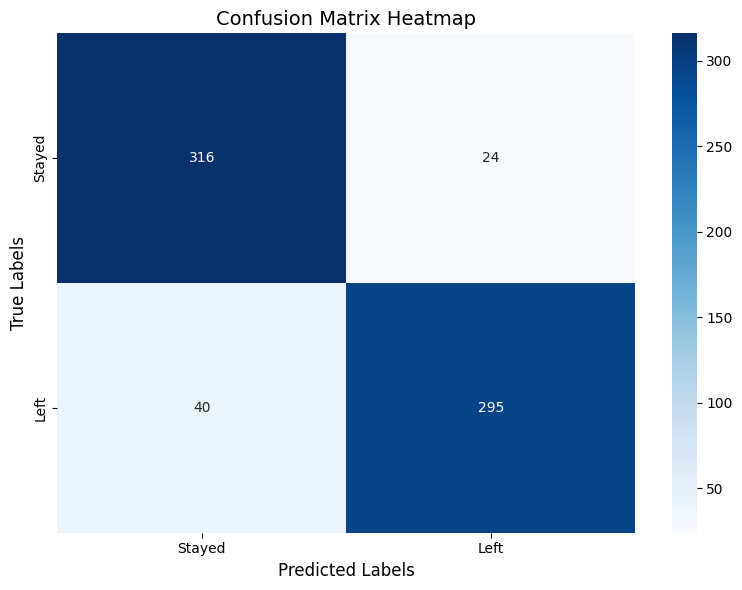

In [45]:
import seaborn as sns
import numpy as np

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Stayed', 'Left'], 
            yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix Heatmap', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.tight_layout()
plt.show()


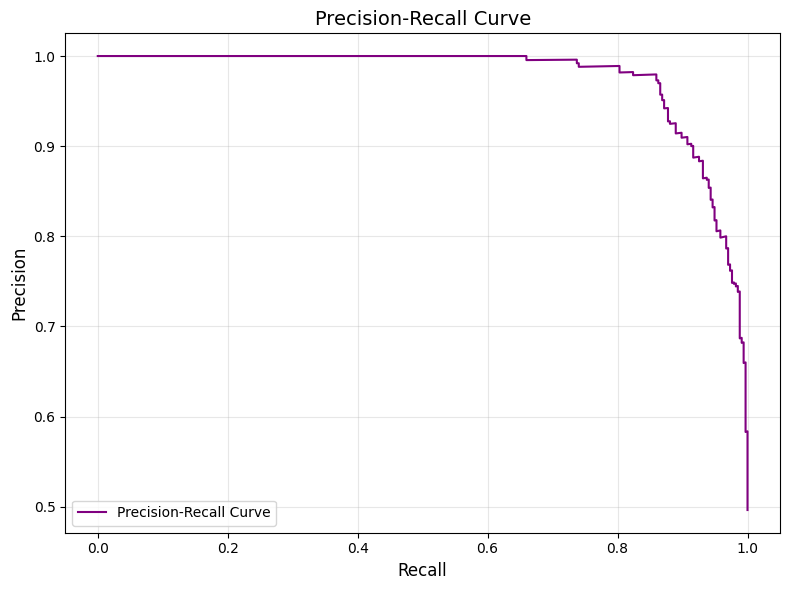


Feature Importance (XGBoost):
                              Feature  Importance
31               EducationField_Other    0.097963
16                   StockOptionLevel    0.085289
27                   Department_Sales    0.061964
37     JobRole_Manufacturing Director    0.054023
42              MaritalStatus_Married    0.050965
32    EducationField_Technical Degree    0.047884
6                      JobInvolvement    0.047832
43               MaritalStatus_Single    0.043897
34            JobRole_Human Resources    0.042044
30             EducationField_Medical    0.036540
28       EducationField_Life Sciences    0.032242
8                     JobSatisfaction    0.030776
29           EducationField_Marketing    0.029308
26  Department_Research & Development    0.028766
4             EnvironmentSatisfaction    0.026480
7                            JobLevel    0.019483
21                 YearsInCurrentRole    0.018092
33                        Gender_Male    0.016656
15           Relati

In [40]:
# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve", color='purple')
plt.title('Precision-Recall Curve', fontsize=14)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(loc='lower left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Feature Importance
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance (XGBoost):")
print(xgb_importance)


ROC-AUC Score: 0.97


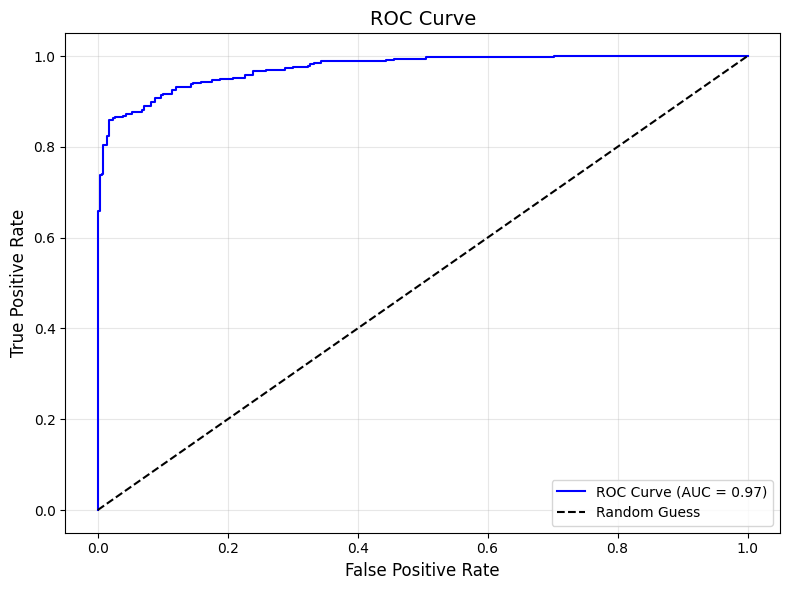

In [41]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [43]:
from sklearn.metrics import balanced_accuracy_score

balanced_acc = balanced_accuracy_score(y_test, y_pred_adjusted)
print(f"Balanced Accuracy: {balanced_acc:.2f}")


Balanced Accuracy: 0.91


In [44]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred_adjusted)
print(f"Matthews Correlation Coefficient: {mcc:.2f}")


Matthews Correlation Coefficient: 0.81


1. **Model Performance:**
   - The XGBoost model, combined with SMOTE for class imbalance, achieved the following:
     - **Accuracy:** 91%
     - **Precision (Class `1` - Left):** 92%
     - **Recall (Class `1` - Left):** 88%
     - **F1-Score (Class `1` - Left):** 90%
     - **ROC-AUC Score:** 0.97
     - Matthews Correlation Coefficient 81%
   - These metrics indicate that the model effectively distinguishes between employees who stayed and those who left, with strong performance in recall for identifying employees likely to leave.

2. **Class-Specific Observations:**
   - **Stayed Employees (Class `0`):**
     - High precision (89%) and recall (93%) mean the model correctly identifies employees who stayed with minimal false positives.
   - **Left Employees (Class `1`):**
     - Precision (92%) ensures that flagged employees likely to leave are accurate.
     - Recall (88%) ensures that most employees who left are identified.

3. **Impact of Threshold Adjustment:**
   - Adjusting the threshold to **0.4** improved the recall for employees likely to leave (Class `1`) without significantly compromising precision. This adjustment strikes a balance between minimizing false negatives (missed attrition cases) and keeping false positives manageable.

4. **Class Imbalance Handling:**
   - The use of **SMOTE** balanced the minority class (`Attrition = 1`), allowing the model to better learn patterns associated with employee attrition.

5. **Feature Importance Insights:**
   - The most influential factors in predicting attrition include:
     - **OverTime:** Employees working overtime are the most likely to leave.
     - **MaritalStatus_Single:** Single employees are more prone to attrition.
     - **Department_Sales:** Employees in Sales have a higher likelihood of leaving.
     - **BusinessTravel_Travel_Frequently:** Frequent business travel correlates strongly with attrition.
     - **YearsAtCompany:** Shorter tenure increases the likelihood of leaving.


1. **Employee Retention Programs:**
   - Focus on reducing overtime or providing compensatory measures for employees regularly working overtime.
   - Pay closer attention to single employees, especially those in departments with high attrition rates, like Sales.

2. **Targeted Support:**
   - Employees traveling frequently for business may require additional support or alternatives to reduce burnout.

3. **Tenure-Based Strategies:**
   - Implement targeted retention strategies for employees with shorter tenure, as they are at higher risk of leaving.

4. **Proactive Interventions:**
   - Use the model predictions to identify employees at high risk of leaving and intervene with tailored programs, such as mentoring, training, or role adjustments.


### Actionable Observations 

1. **Employee Retention Programs:**
   - Focus on reducing overtime or providing compensatory measures for employees regularly working overtime.
   - Pay closer attention to single employees, especially those in departments with high attrition rates, like Sales.

2. **Targeted Support:**
   - Employees traveling frequently for business may require additional support or alternatives to reduce burnout.

3. **Tenure-Based Strategies:**
   - Implement targeted retention strategies for employees with shorter tenure, as they are at higher risk of leaving.

4. **Proactive Interventions:**
   - Use the model predictions to identify employees at high risk of leaving and intervene with tailored programs, such as mentoring, training, or role adjustments.


The predictive model demonstrates excellent performance in identifying employees likely to leave, making it a valuable tool for HR teams. By focusing on the identified drivers of attrition, the organization can implement effective strategies to improve retention and reduce turnover costs.
